In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import necessary libraries for data manipulation, visualization, and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
import os
Data = pd.read_csv('./data/apple_quality.csv')

In [6]:
Data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [8]:
Data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [9]:
# Check for missing values in each column
Data.isnull().sum()
# Check for duplicate rows in the dataset
Data.duplicated().sum()
# Drop duplicate rows if any exist
Data.dropna(inplace = True)
# Verify that there are no remaining missing values after cleaning
Data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [10]:
# Convert the 'Acidity' column to float type for consistency
Data['Acidity'] = Data['Acidity'].astype(float)

In [11]:
# Map the 'Quality' column values to binary: 'good' to 1 and 'bad' to 0
Data['Quality'] = Data['Quality'].map({'good':1, 'bad':0})

In [12]:
Data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [13]:
# Calculate and display the correlation matrix
Data.corr()['Quality']

A_id           0.004875
Size           0.244007
Weight         0.001421
Sweetness      0.250998
Crunchiness   -0.012376
Juiciness      0.260223
Ripeness      -0.264315
Acidity       -0.007697
Quality        1.000000
Name: Quality, dtype: float64

In [14]:
# Drop the column 'A_id' as it may not be relevant for analysis
Data.drop(columns=['A_id'], inplace=True)

In [15]:
# Display the first few rows after dropping unnecessary columns
Data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [16]:
Data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


In [17]:
# Display dataset information again to confirm the changes made to columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


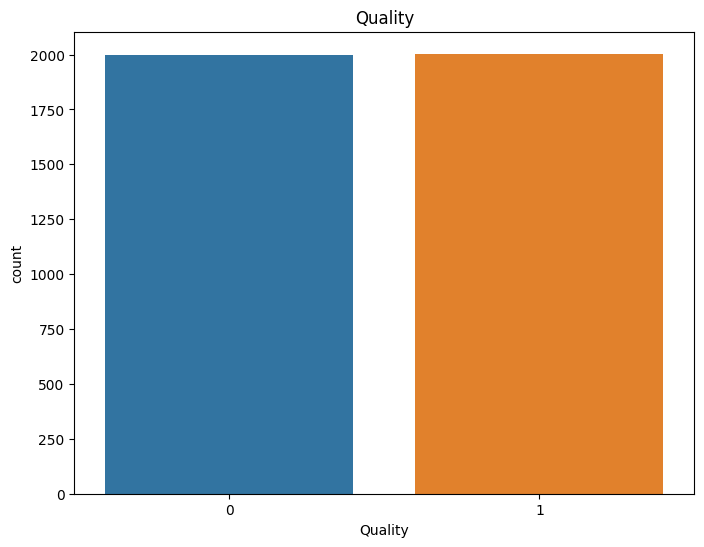

In [18]:
# Plot a countplot to visualize the distribution of the 'Quality' variable
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='Quality', palette=['#1f77b4', '#ff7f0e'])  # 设置两个不同的颜色
plt.title('Quality')
plt.show()

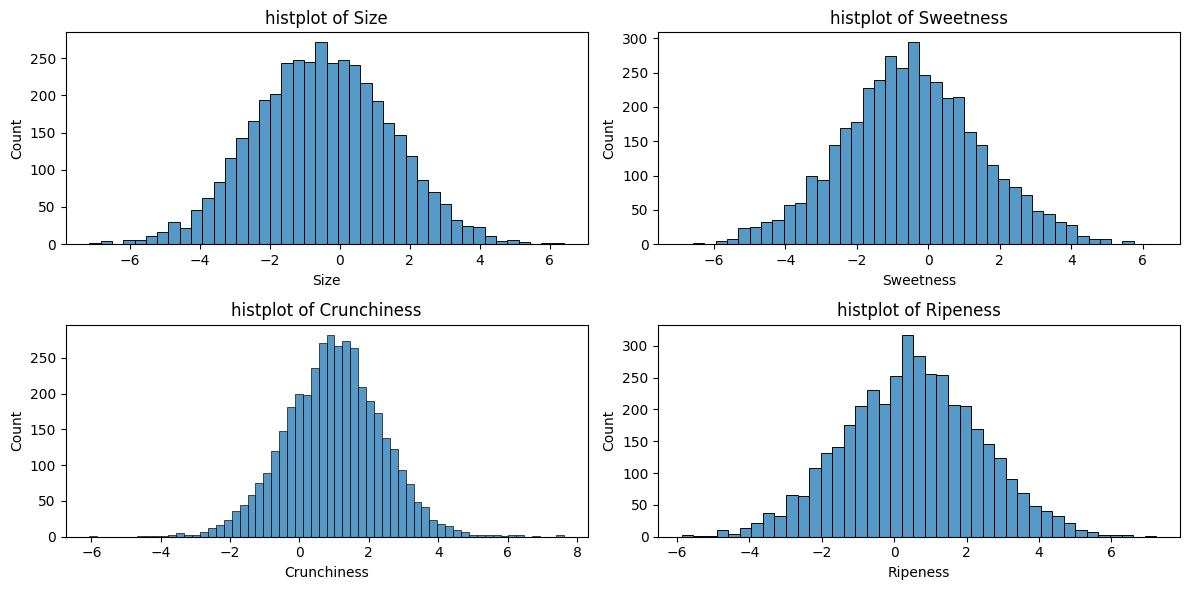

In [19]:
# Create histograms for various features to visualize their distributions
plt.figure(figsize=(12, 6))

# Histogram of 'Size'
plt.subplot(2, 2, 1)
sns.histplot(x=Data['Size'])
plt.title('histplot of Size')

# Histogram of 'Sweetness'
plt.subplot(2, 2, 2)
sns.histplot(x=Data['Sweetness'])
plt.title('histplot of Sweetness')

# Histogram of 'Crunchiness'
plt.subplot(2, 2, 3)
sns.histplot(x=Data['Crunchiness'])
plt.title('histplot of Crunchiness')

# Histogram of 'Ripeness'
plt.subplot(2, 2, 4)
sns.histplot(x=Data['Ripeness'])
plt.title('histplot of Ripeness')

plt.tight_layout()
plt.show()

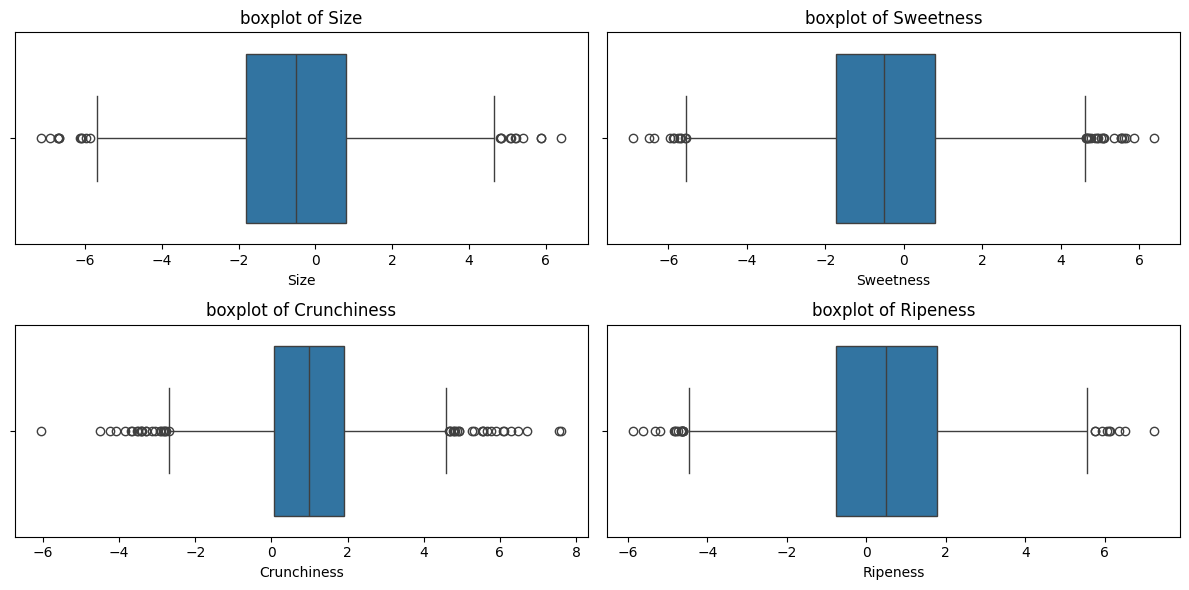

In [20]:
# Set up a figure with multiple subplots for histograms of different features
plt.figure(figsize=(12, 6))

# Plot histograms for 'Size', 'Sweetness', 'Crunchiness', and 'Ripeness' to observe their distributions
plt.subplot(2, 2, 1)
sns.boxplot(x=Data['Size'])
plt.title('boxplot of Size')

plt.subplot(2, 2, 2)
sns.boxplot(x=Data['Sweetness'])
plt.title('boxplot of Sweetness')

plt.subplot(2, 2, 3)
sns.boxplot(x=Data['Crunchiness'])
plt.title('boxplot of Crunchiness')

plt.subplot(2, 2, 4)
sns.boxplot(x=Data['Ripeness'])
plt.title('boxplot of Ripeness')

plt.tight_layout()
plt.show()

<Axes: >

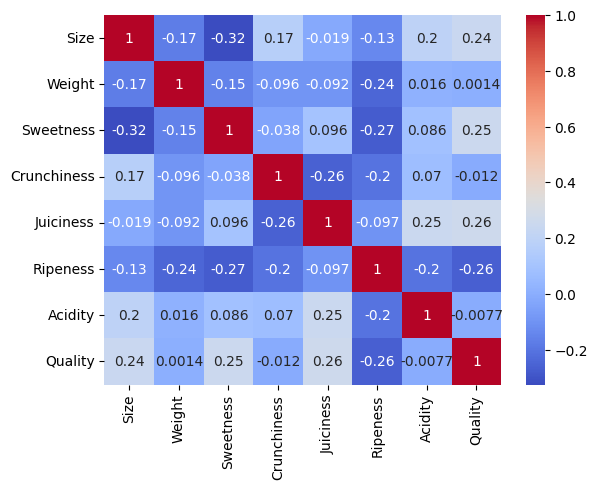

In [21]:
# Plot a heatmap to visualize the correlation matrix of the dataset
sns.heatmap(Data.corr(),annot=True,cmap='coolwarm')

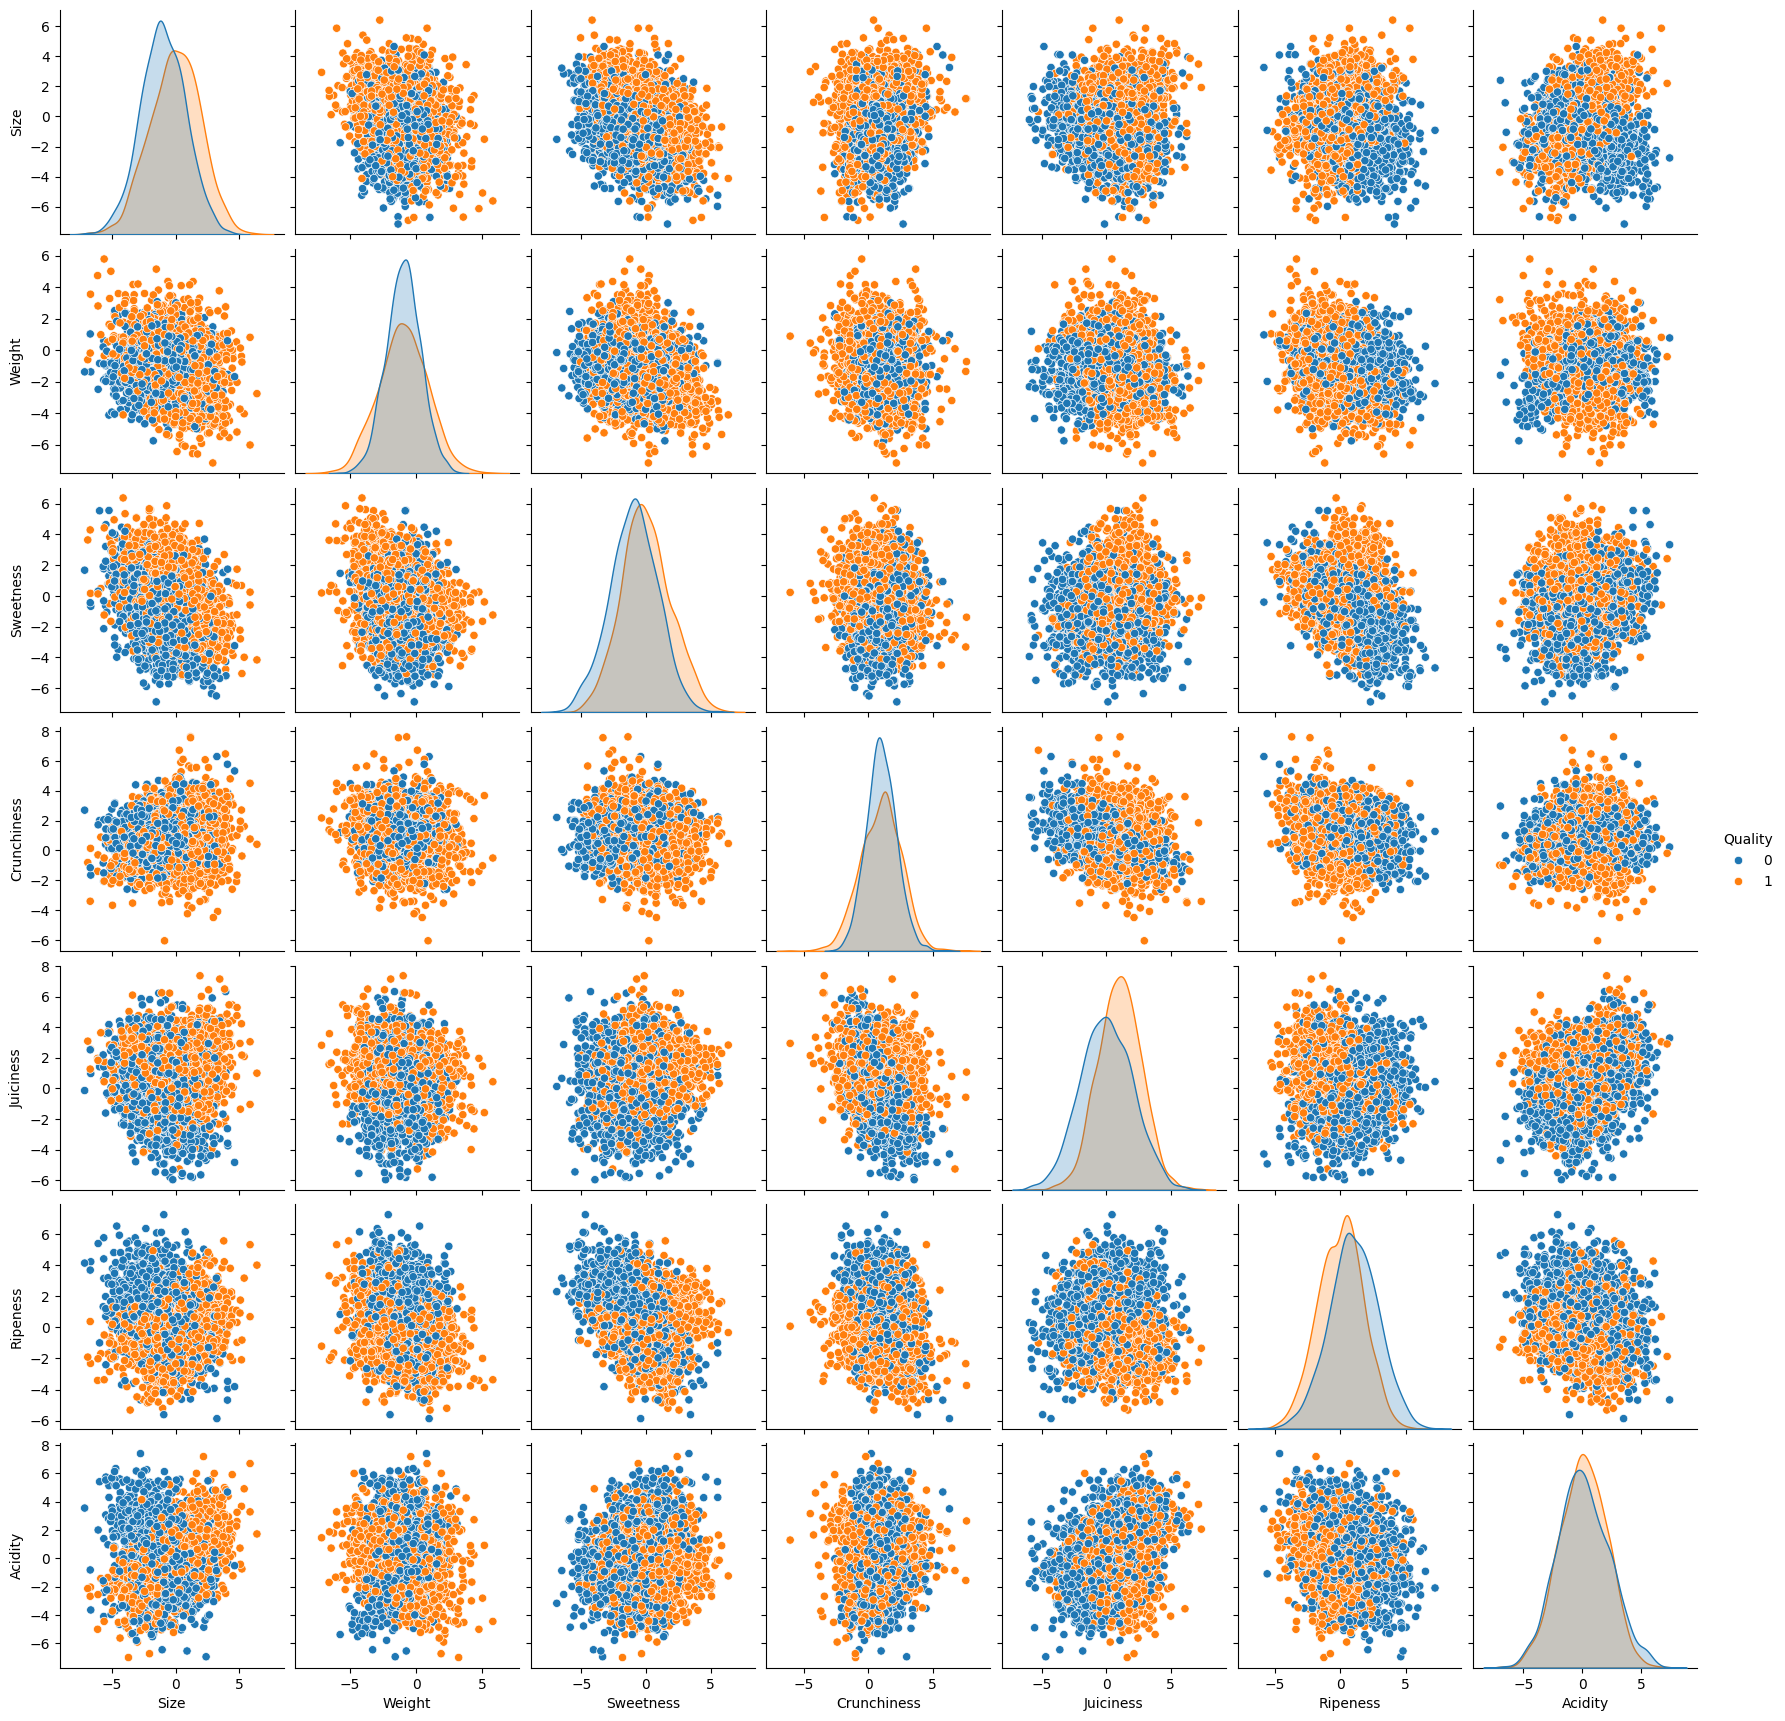

In [22]:
# Create pair plots to visualize relationships between all pairs of features with 'Quality' as hue
sns.pairplot(Data, hue='Quality')
plt.show()

In [23]:
# Define bounds for outliers using the interquartile range (IQR) method
filter_data=Data.iloc[:,[0,1,2,3,4,5,6]]
filter_data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [24]:
# Identify and remove outliers from the dataset
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Data[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]

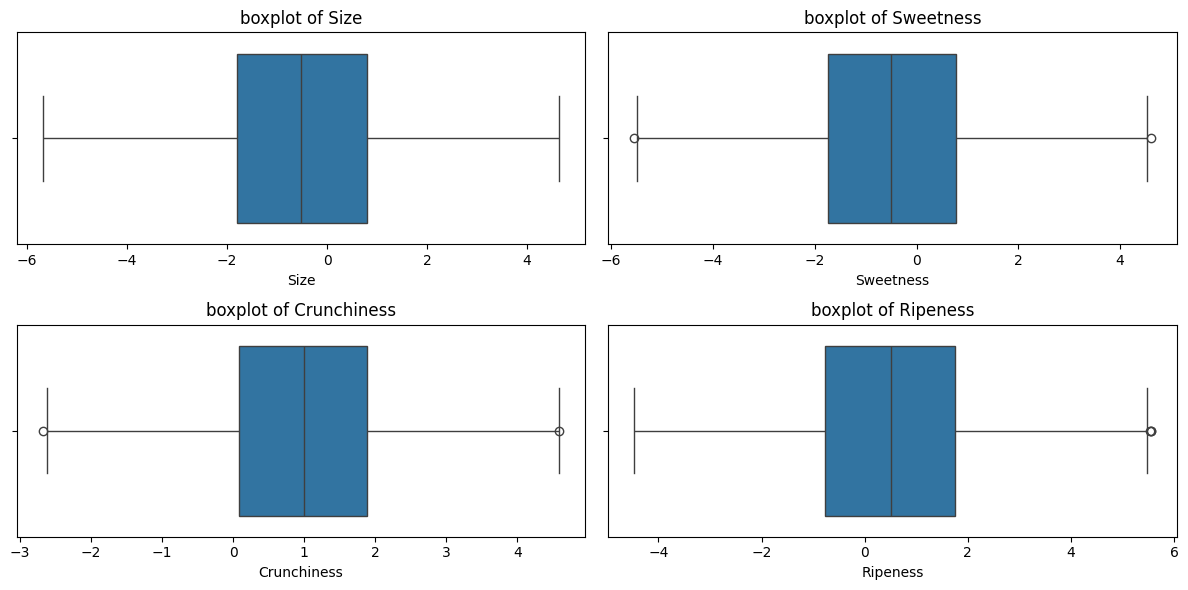

In [25]:
# Plot histograms for each feature again after removing outliers to observe the changes in distributions
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x=Data['Size'])
plt.title('boxplot of Size')

plt.subplot(2, 2, 2)
sns.boxplot(x=Data['Sweetness'])
plt.title('boxplot of Sweetness')

plt.subplot(2, 2, 3)
sns.boxplot(x=Data['Crunchiness'])
plt.title('boxplot of Crunchiness')

plt.subplot(2, 2, 4)
sns.boxplot(x=Data['Ripeness'])
plt.title('boxplot of Ripeness')

plt.tight_layout()
plt.show()

In [26]:
# Check for any remaining missing values in the dataset after outlier removal
Data.isnull().sum()

Size           22
Weight         54
Sweetness      32
Crunchiness    47
Juiciness      32
Ripeness       24
Acidity        20
Quality         0
dtype: int64

In [27]:
# Drop any remaining missing values in the dataset
Data.dropna(inplace= True)

In [28]:
# Selecting the first 7 columns as features (X) and the 8th column as the target variable (y)
x = Data.iloc[:,0:7]
y = Data.iloc[:,7:8]

In [29]:
# Displaying the first 5 rows of the features (X)
x.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523


In [30]:
# Displaying the first 5 rows of the target variable (y)
y.head()

,Quality
1,1
2,0
3,1
4,1
5,0


<Axes: >

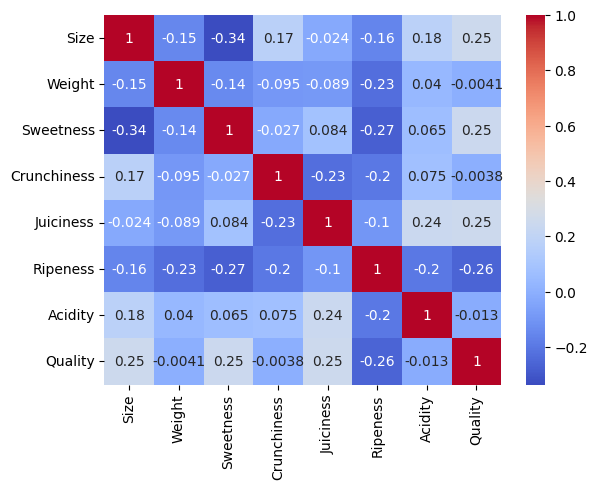

In [31]:
# Display the heatmap again to re-evaluate correlations after cleaning and outlier removal
sns.heatmap(Data.corr(),annot=True,cmap='coolwarm')

In [92]:
# Drop the 'Quality' column as it will be used as the target variable
X = Data.drop("Quality", axis = 1)
y = Data["Quality"]

In [93]:
# Splitting the dataset into training and testing sets
# 70% of the data will be used for training and 30% for testing
# random_state=0 ensures reproducibility of the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [94]:
# Standardizing the features by removing the mean and scaling to unit variance
# This improves the performance of some machine learning algorithmsfrom sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
# Initializing and training the Logistic Regression model
# The model will learn the relationship between the features in X_train and the target variable in y_train
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Making predictions on the test set using the trained Logistic Regression model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = LR.predict(X_test)

In [37]:
# Printing the model's accuracy on the test set 
print("Model Accuracy (using LR.score):", LR.score(X_test, y_test))

Model Accuracy (using LR.score): 0.741424802110818


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Initializing the Random Forest model
RF = RandomForestClassifier(random_state=0)

# Training the model on the training data
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
# Making predictions on the test set
y_pred_rf = RF.predict(X_test)

# Evaluating the model's performance
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8883025505716798


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing the K-Nearest Neighbors model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=8)

# Training the KNN model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [65]:
# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model's performance
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Model Accuracy: 0.8970976253298153


In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier,ExtraTreesClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc

from sklearn.neural_network import MLPClassifier

tree_clf = DecisionTreeClassifier(max_depth=12)
ada_clf = AdaBoostClassifier(estimator=tree_clf, n_estimators=75, learning_rate=0.75, random_state=42)
scores = cross_val_score(ada_clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.88654354 0.88918206 0.88918206 0.87730871 0.90369393]
Mean accuracy: 0.8891820580474935
Standard deviation: 0.00846797178674472


In [80]:
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X, y, cv=5)
print("Support Vector Classifier (SVC) cross-validation scores:", svc_scores)
print("Mean accuracy:", svc_scores.mean())

Support Vector Classifier (SVC) cross-validation scores: [0.8878628  0.89050132 0.87994723 0.88258575 0.89182058]
Mean accuracy: 0.8865435356200528


In [81]:
nb_clf = GaussianNB()
nb_scores = cross_val_score(nb_clf, X, y, cv=5)
print("Naive Bayes Classifier cross-validation scores:", nb_scores)
print("Mean accuracy:", nb_scores.mean())

Naive Bayes Classifier cross-validation scores: [0.73746702 0.75197889 0.76121372 0.73087071 0.75197889]
Mean accuracy: 0.7467018469656991


In [82]:
xgb_clf = xgb.XGBClassifier()
xgb_scores = cross_val_score(xgb_clf, X, y, cv=5)
print("XGBoost cross-validation scores:", xgb_scores)
print("Mean accuracy:", xgb_scores.mean())

XGBoost cross-validation scores: [0.88918206 0.88522427 0.87994723 0.88522427 0.89050132]
Mean accuracy: 0.8860158311345646


In [83]:
bagging_clf = BaggingClassifier()
bagging_scores = cross_val_score(bagging_clf, X, y, cv=5)
print("Bagging Classifier cross-validation scores:", bagging_scores)
print("Mean accuracy:", bagging_scores.mean())

Bagging Classifier cross-validation scores: [0.85751979 0.85224274 0.86543536 0.86279683 0.86543536]
Mean accuracy: 0.8606860158311346


In [84]:
ridge_clf = RidgeClassifier()
ridge_scores = cross_val_score(ridge_clf, X, y, cv=5)
print("Ridge Classifier cross-validation scores:", ridge_scores)
print("Mean accuracy:", ridge_scores.mean())

Ridge Classifier cross-validation scores: [0.76912929 0.72427441 0.75197889 0.74010554 0.72823219]
Mean accuracy: 0.7427440633245382


In [85]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.075, random_state=42)
scores = cross_val_score(mlp_clf, X, y, cv=5) 
print("MLP Classifier cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

MLP Classifier cross-validation scores: [0.92480211 0.92216359 0.9353562  0.93007916 0.93667546]
Mean accuracy: 0.9298153034300791


In [88]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import time
from IPython.display import display, Audio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Convert y_train and y_test to NumPy arrays before converting to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

In [ ]:
# Create a dataset and data loader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 32)
        self.dropout3 = nn.Dropout(0.5)
        self.output = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.sigmoid(self.output(x))
        return x



def play_simple_beep():
    # Generate a 1-second, 440Hz tone
    framerate = 44100
    duration = 1
    t = np.linspace(0, duration, int(framerate * duration))
    sound = np.sin(2 * np.pi * 440 * t)  # 440Hz is the standard pitch (A4)
    display(Audio(sound, rate=framerate, autoplay=True))

Epoch 1, Loss: 0.6546, Training Accuracy: 0.6155
Validation Loss: 0.5449, Validation Accuracy: 0.7810
New best validation loss. Model saved.
Epoch 2, Loss: 0.5001, Training Accuracy: 0.7765
Validation Loss: 0.3844, Validation Accuracy: 0.8241
New best validation loss. Model saved.
Epoch 3, Loss: 0.4409, Training Accuracy: 0.8074
Validation Loss: 0.3518, Validation Accuracy: 0.8461
New best validation loss. Model saved.
Epoch 4, Loss: 0.4269, Training Accuracy: 0.8085
Validation Loss: 0.3381, Validation Accuracy: 0.8558
New best validation loss. Model saved.
Epoch 5, Loss: 0.4094, Training Accuracy: 0.8168
Validation Loss: 0.3258, Validation Accuracy: 0.8619
New best validation loss. Model saved.
Epoch 6, Loss: 0.3817, Training Accuracy: 0.8308
Validation Loss: 0.3162, Validation Accuracy: 0.8558
New best validation loss. Model saved.
Epoch 7, Loss: 0.3912, Training Accuracy: 0.8210
Validation Loss: 0.3170, Validation Accuracy: 0.8602
Early stopping counter: 1/20
Epoch 8, Loss: 0.3656, 

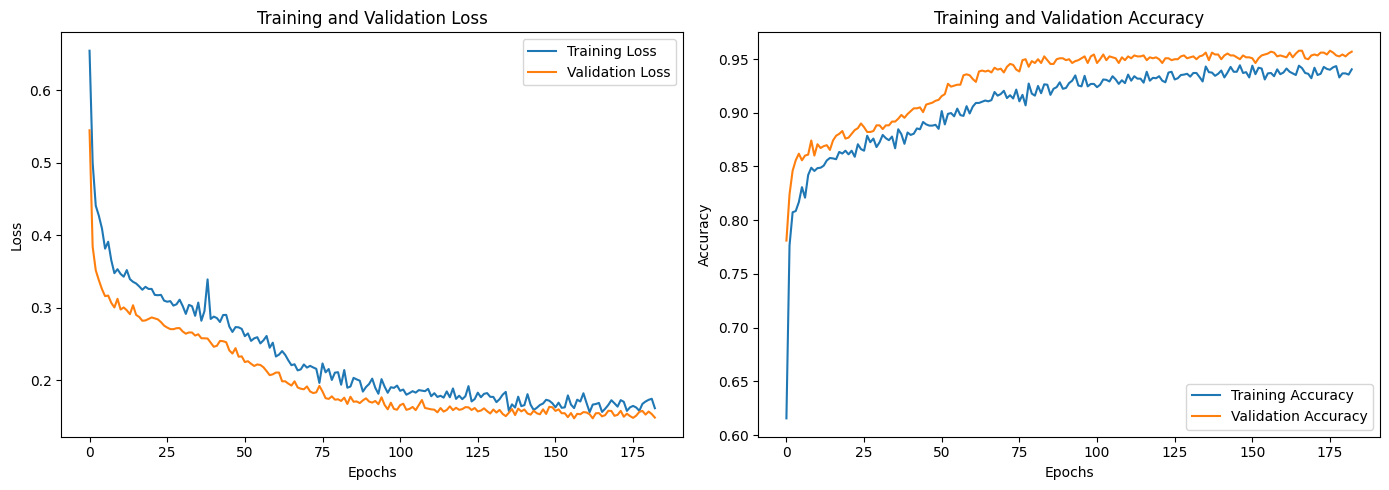

Test Accuracy: 0.95690


Total execution time: 73.35 seconds


In [112]:
start_time = time.time()

# Initialize the model, loss function, and optimizer
model = NeuralNetwork(input_size=X_train.shape[1])
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)  # L2 regularization (weight_decay)

# Training with early stopping
epochs = 500
patience = 20
best_val_loss = np.inf  # Initialize to infinity so that any loss will be lower
early_stopping_counter = 0

# Lists to store metrics for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    # Training loop
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        # Calculate training accuracy
        predicted_train = (y_pred > 0.5).float()
        correct_train += (predicted_train == y_batch).sum().item()
        total_train += y_batch.size(0)
    
    # Calculate average training loss and accuracy for the epoch
    epoch_loss /= len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)
    
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Validation step for early stopping
    model.eval()
    with torch.no_grad():
        val_pred = model(X_test)
        val_loss = criterion(val_pred, y_test)
        val_losses.append(val_loss.item())
        
        # Calculate validation accuracy
        predicted_val = (val_pred > 0.5).float()
        val_accuracy = accuracy_score(y_test, predicted_val)
        val_accuracies.append(val_accuracy)
        
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        
        # Check if this is the lowest validation loss so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0  # Reset counter
            best_model_state = model.state_dict()  # Save the best model state
            print("New best validation loss. Model saved.")
        else:
            early_stopping_counter += 1
            print(f"Early stopping counter: {early_stopping_counter}/{patience}")
        
        # Trigger early stopping if the counter reaches the patience level
        if early_stopping_counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model state with the lowest validation loss
model.load_state_dict(best_model_state)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred_class = (y_test_pred > 0.5).float()  # Convert probabilities to binary class (0 or 1)
    accuracy = accuracy_score(y_test, y_test_pred_class)
    print(f"Test Accuracy: {accuracy:.5f}")

# Play beep sound
play_simple_beep()
    
# Record end time and calculate total duration
end_time = time.time()
elapsed_time = end_time - start_time
    
# Print execution time
print(f"Total execution time: {elapsed_time:.2f} seconds")

In [113]:
torch.save(model.state_dict(), 'apple_DL_3.pth')

In [121]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.output = nn.Linear(32, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn2(self.fc2(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn3(self.fc3(x)), negative_slope=0.01)
        x = torch.sigmoid(self.output(x))
        return x


Epoch 1, Loss: 0.4529, Training Accuracy: 0.8104
Validation Loss: 0.3381, Validation Accuracy: 0.8795
New best validation loss. Model saved.
Epoch 2, Loss: 0.3399, Training Accuracy: 0.8587
Validation Loss: 0.2943, Validation Accuracy: 0.8839
New best validation loss. Model saved.
Epoch 3, Loss: 0.2985, Training Accuracy: 0.8813
Validation Loss: 0.2595, Validation Accuracy: 0.9033
New best validation loss. Model saved.
Epoch 4, Loss: 0.2708, Training Accuracy: 0.8911
Validation Loss: 0.2419, Validation Accuracy: 0.9120
New best validation loss. Model saved.
Epoch 5, Loss: 0.2630, Training Accuracy: 0.8918
Validation Loss: 0.2232, Validation Accuracy: 0.9103
New best validation loss. Model saved.
Epoch 6, Loss: 0.2525, Training Accuracy: 0.8963
Validation Loss: 0.2330, Validation Accuracy: 0.9173
Early stopping counter: 1/10
Epoch 7, Loss: 0.2307, Training Accuracy: 0.9054
Validation Loss: 0.2083, Validation Accuracy: 0.9235
New best validation loss. Model saved.
Epoch 8, Loss: 0.2393, 

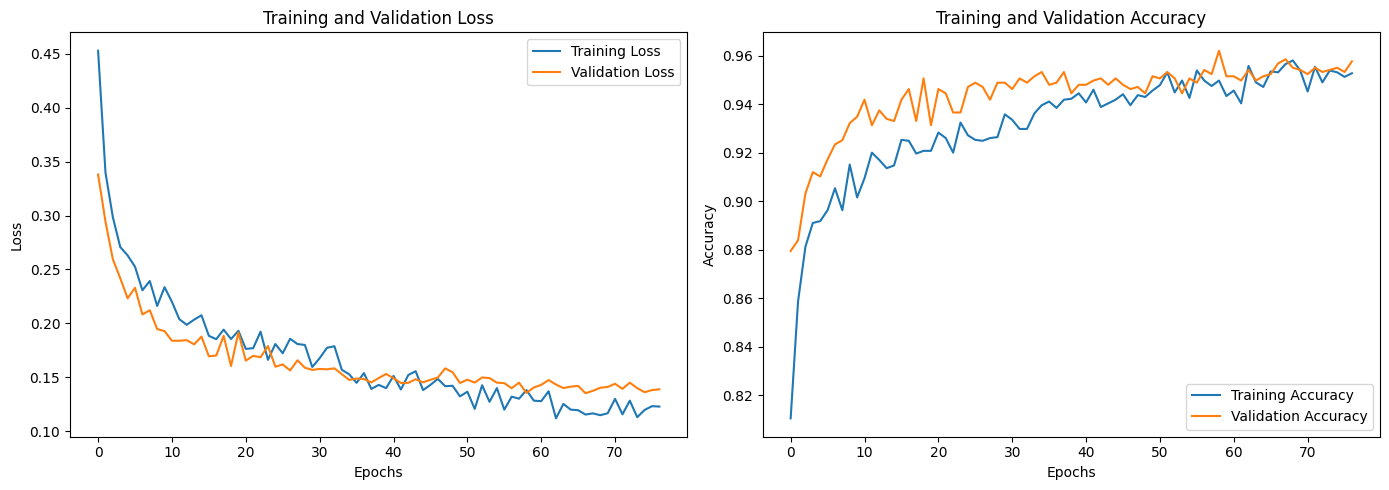

Test Accuracy: 0.95778


Total execution time: 47.14 seconds


In [124]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

start_time = time.time()

# Initialize the model, loss function, and optimizer
model = NeuralNetwork(input_size=X_train.shape[1])
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)  # L2 regularization (weight_decay)

# Initialize learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)  # Reduce LR by half if no improvement in 5 epochs

# Training with early stopping
epochs = 500
patience = 10
best_val_loss = np.inf  # Initialize to infinity so that any loss will be lower
early_stopping_counter = 0

# Lists to store metrics for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    # Training loop
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        # Calculate training accuracy
        predicted_train = (y_pred > 0.5).float()
        correct_train += (predicted_train == y_batch).sum().item()
        total_train += y_batch.size(0)
    
    # Calculate average training loss and accuracy for the epoch
    epoch_loss /= len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)
    
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Validation step for early stopping
    model.eval()
    with torch.no_grad():
        val_pred = model(X_test)
        val_loss = criterion(val_pred, y_test)
        val_losses.append(val_loss.item())
        
        # Calculate validation accuracy
        predicted_val = (val_pred > 0.5).float()
        val_accuracy = accuracy_score(y_test, predicted_val)
        val_accuracies.append(val_accuracy)
        
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        
        # Adjust learning rate based on validation loss
        scheduler.step(val_loss)

        # Check if this is the lowest validation loss so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0  # Reset counter
            best_model_state = model.state_dict()  # Save the best model state
            print("New best validation loss. Model saved.")
        else:
            early_stopping_counter += 1
            print(f"Early stopping counter: {early_stopping_counter}/{patience}")
        
        # Trigger early stopping if the counter reaches the patience level
        if early_stopping_counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model state with the lowest validation loss
model.load_state_dict(best_model_state)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred_class = (y_test_pred > 0.5).float()  # Convert probabilities to binary class (0 or 1)
    accuracy = accuracy_score(y_test, y_test_pred_class)
    print(f"Test Accuracy: {accuracy:.5f}")

# Play beep sound
play_simple_beep()
    
# Record end time and calculate total duration
end_time = time.time()
elapsed_time = end_time - start_time
    
# Print execution time
print(f"Total execution time: {elapsed_time:.2f} seconds")


In [125]:
torch.save(model.state_dict(), 'apple_DL_4.pth')

Epoch 1, Loss: 0.4582, Training Accuracy: 0.8014
Validation Loss: 0.3444, Validation Accuracy: 0.8646
New best validation loss. Model saved.
Epoch 2, Loss: 0.3376, Training Accuracy: 0.8602
Validation Loss: 0.3063, Validation Accuracy: 0.8672
New best validation loss. Model saved.
Epoch 3, Loss: 0.3080, Training Accuracy: 0.8677
Validation Loss: 0.2899, Validation Accuracy: 0.8786
New best validation loss. Model saved.
Epoch 4, Loss: 0.2950, Training Accuracy: 0.8726
Validation Loss: 0.2630, Validation Accuracy: 0.8945
New best validation loss. Model saved.
Epoch 5, Loss: 0.2805, Training Accuracy: 0.8786
Validation Loss: 0.2478, Validation Accuracy: 0.9120
New best validation loss. Model saved.
Epoch 6, Loss: 0.2587, Training Accuracy: 0.8907
Validation Loss: 0.2261, Validation Accuracy: 0.9138
New best validation loss. Model saved.
Epoch 7, Loss: 0.2455, Training Accuracy: 0.8979
Validation Loss: 0.2200, Validation Accuracy: 0.9156
New best validation loss. Model saved.
Epoch 8, Loss

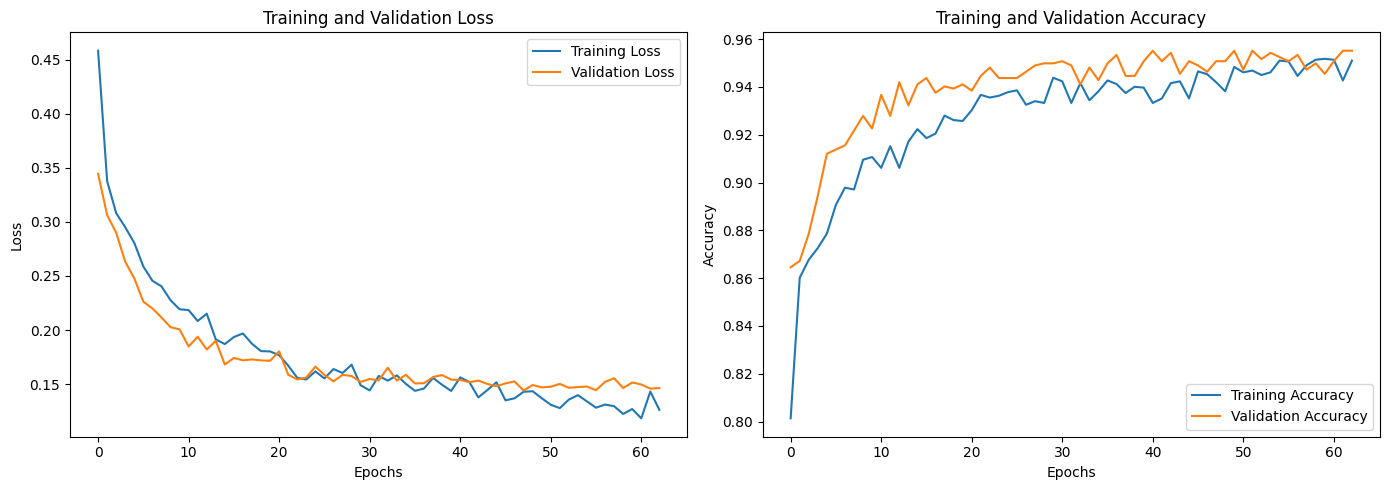

Test Accuracy: 0.95515


Total execution time: 43.46 seconds


In [130]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

start_time = time.time()

# Initialize the model, loss function, and optimizer
model = NeuralNetwork(input_size=X_train.shape[1])
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)  # L2 regularization (weight_decay)

# Initialize learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=5, verbose=True)  # Reduce LR by half if no improvement in 5 epochs

# Training with early stopping
epochs = 500
patience = 15
best_val_loss = np.inf  # Initialize to infinity so that any loss will be lower
early_stopping_counter = 0

# Lists to store metrics for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    # Training loop
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        # Calculate training accuracy
        predicted_train = (y_pred > 0.5).float()
        correct_train += (predicted_train == y_batch).sum().item()
        total_train += y_batch.size(0)
    
    # Calculate average training loss and accuracy for the epoch
    epoch_loss /= len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)
    
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Validation step for early stopping
    model.eval()
    with torch.no_grad():
        val_pred = model(X_test)
        val_loss = criterion(val_pred, y_test)
        val_losses.append(val_loss.item())
        
        # Calculate validation accuracy
        predicted_val = (val_pred > 0.5).float()
        val_accuracy = accuracy_score(y_test, predicted_val)
        val_accuracies.append(val_accuracy)
        
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        
        # Adjust learning rate based on validation loss
        scheduler.step(val_loss)

        # Check if this is the lowest validation loss so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0  # Reset counter
            best_model_state = model.state_dict()  # Save the best model state
            print("New best validation loss. Model saved.")
        else:
            early_stopping_counter += 1
            print(f"Early stopping counter: {early_stopping_counter}/{patience}")
        
        # Trigger early stopping if the counter reaches the patience level
        if early_stopping_counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model state with the lowest validation loss
model.load_state_dict(best_model_state)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred_class = (y_test_pred > 0.5).float()  # Convert probabilities to binary class (0 or 1)
    accuracy = accuracy_score(y_test, y_test_pred_class)
    print(f"Test Accuracy: {accuracy:.5f}")

# Play beep sound
play_simple_beep()
    
# Record end time and calculate total duration
end_time = time.time()
elapsed_time = end_time - start_time
    
# Print execution time
print(f"Total execution time: {elapsed_time:.2f} seconds")
